## Vehicle dataset

This dataset contains information about used cars.This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

The columns in the given dataset are as follows:

1. name
2. year
3. selling_price
4. km_driven
5. fuel
6. seller_type
7. transmission
8. Owner

#### Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [3]:
dataset=pd.read_csv('car data.csv')

In [4]:
dataset.shape

(301, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
dataset.select_dtypes(include=['object']).columns.tolist()

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [9]:
print(dataset['Seller_Type'].unique())
print(dataset['Transmission'].unique())
print(dataset['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']


In [10]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
new_dataset=dataset[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner' ]]

In [12]:
new_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
new_dataset['current_year']=2020

In [14]:
new_dataset['car_age']=new_dataset['current_year']-new_dataset['Year']

In [15]:
new_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [16]:
new_dataset.drop(columns=['Year','current_year'],inplace=True)

In [17]:
new_dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


### Encoding categorical data

In [18]:
new_dataset=pd.get_dummies(new_dataset,drop_first=True)

In [19]:
new_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


array([[<AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>,
        <AxesSubplot:title={'center':'car_age'}>,
        <AxesSubplot:title={'center':'Fuel_Type_Diesel'}>],
       [<AxesSubplot:title={'center':'Fuel_Type_Petrol'}>,
        <AxesSubplot:title={'center':'Seller_Type_Individual'}>,
        <AxesSubplot:title={'center':'Transmission_Manual'}>]],
      dtype=object)

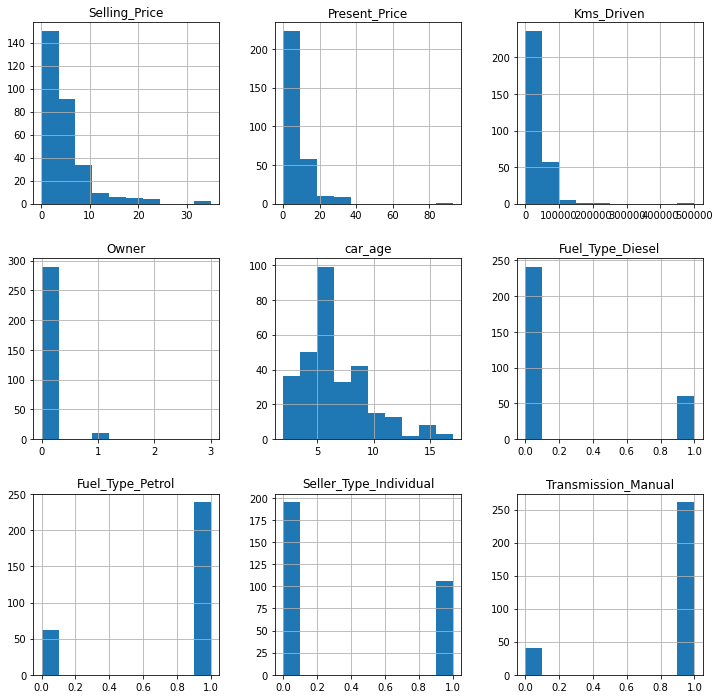

In [20]:
new_dataset.hist(figsize=(12,12),bins=10)

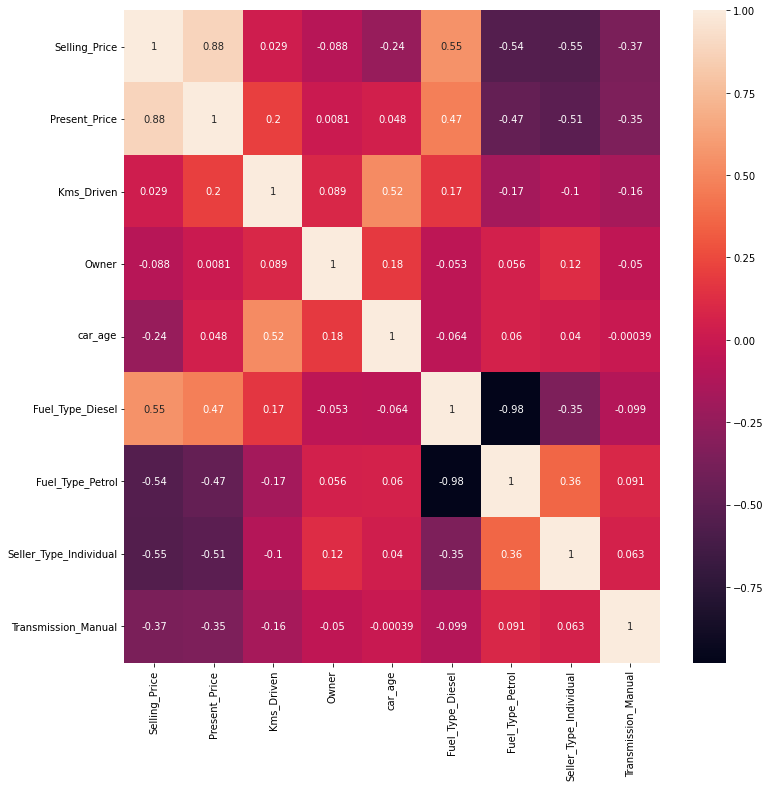

In [21]:
corr_matrix=new_dataset.corr()
plt.figure(figsize=(12,12))
hm = sn.heatmap(corr_matrix,annot=True)
plt.show()

### Features


In [22]:
new_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [23]:
X=new_dataset.iloc[:,1:].values
y=new_dataset.iloc[:,0].values

### Important Feature

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.35556455 0.04240779 0.00090992 0.07446925 0.23163517 0.01291718
 0.13495082 0.14714532]


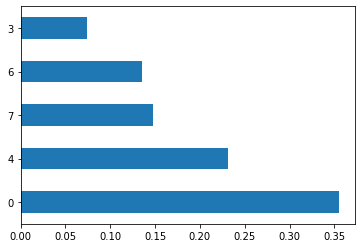

In [26]:
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Test Train Split

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Training Model

In [28]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [29]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [30]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [31]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [32]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [33]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [34]:
y_pred=rf_random.predict(X_test)
y_pred

array([ 7.23   ,  0.55967,  4.98469,  9.14663, 16.24925,  5.00763,
        3.3934 ,  0.78007,  4.6779 ,  4.5467 ,  3.13089,  0.88604,
        5.02717,  8.03817,  7.89774, 10.32147,  7.31833,  4.08178,
        0.492  ,  1.47835,  3.97141,  4.655  ,  5.63655,  9.37637,
        0.25516,  0.76941,  0.53895,  0.63864,  0.50413,  4.85627,
        5.15468,  5.83215,  0.51674,  8.72046,  3.5226 ,  1.16993,
        5.61863,  7.37321,  0.25475,  9.04041,  9.35489, 19.34015,
        4.92517,  4.07885,  5.4723 , 11.81913,  0.32209,  0.90496,
        5.01495,  8.41426,  7.59557,  3.56706,  4.7254 , 20.67623,
        1.09426,  1.03468,  0.50356,  2.7544 ,  3.7177 ,  1.2072 ,
        3.84798,  8.6418 ,  3.20345, 20.59733,  4.18326,  5.599  ,
       10.35278,  4.86812,  0.51552,  2.95985,  3.38665,  3.09045,
        0.62986,  5.5282 ,  0.87402,  2.82396,  0.51408,  9.06798,
        1.1865 ,  2.76557,  0.49172, 10.07271,  7.37405,  5.55464,
        5.07415,  0.93625,  6.18095,  6.00631,  0.46638,  4.99

C:\Users\faizimam\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

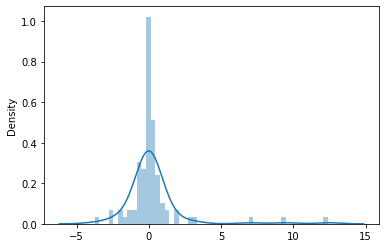

In [35]:
sn.distplot(y_test-y_pred)

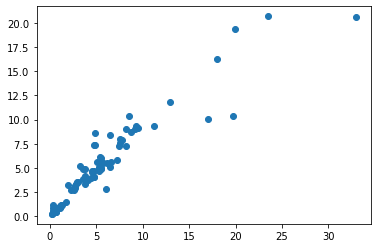

In [36]:
plt.scatter(y_test,y_pred)

In [37]:
result_np = np.concatenate((y_pred.reshape(len(y_pred), 1), (y_test.reshape(len(y_test), 1))), 1)
result = pd.DataFrame(result_np, columns=['Prediction', 'Real_Value'])
result

,Prediction,Real_Value
0,7.23000,8.25
1,0.55967,0.50
2,4.98469,5.25
3,9.14663,9.50
4,16.24925,18.00
...,...,...
86,6.18095,5.35
87,6.00631,5.50
88,0.46638,0.60
89,4.99118,5.30


In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.8913570695970701
MSE: 4.024738113232239
RMSE: 2.0061749956651935
